# ELM463

## LAB 2

### Alperen Arslan - 1801022071

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import array, int32, pad

### Functions

##### PGM Read

In [52]:
# Description:
#
# Read given matrix to PGM file
#
# @param[1]: Filename. It is name of PGM file that wants to read.
#
# @return[1]: Image Data. The values of image pixels.
# @return[2]: Magic Number. Magic number is identifies the file type. PGM file type is P5. Default define is P5.
# @return[3]: Width. Width value of the image.
# @return[4]: Height. Height value of the image.
# @return[5]: Resolution. The value of maximum pixel value.
#
def pgmread(filename):
    # Open pgm file with binary reading
    f = open(filename,'rb')
    
    # Read all the pgm file
    imageBinary = f.read()

    # Header struct
    # P5\n (or P2 / Magic Number)
    # 512 512\n (Width and height value, blank space between these number)
    # 256\n (Resolution value)
    # Data (Binary format)
    
    # Define variables for header reader while loop
    lineCounter = 0
    cursorIndex = 0
    buffer = '' # Reading buffer
    width = '' # Height info
    height = '' # Width info

    # Reading the header struct of pgm file
    # Skip all comments
    # Just read magic number, width, height and resolution
    # Boundry for line number, because of header struct consist of three lines
    while lineCounter < 3:
        # Read binary till encounter the line feed
        # It means, it read one line
        if (chr(imageBinary[cursorIndex]) == '\n'):
            if(lineCounter == 2): # Resolution info
                resolution = buffer
                lineCounter = lineCounter + 1 # Increase line counter
                buffer = '' # Clean buffer
            if (lineCounter == 1): # Width and height info
                [width,height] = buffer.split(' ') # Split buffer to take width and height infos
                lineCounter = lineCounter + 1
                buffer = ''
            if (lineCounter == 0): # Magic num info
                magicNum = buffer
                lineCounter = lineCounter + 1
                buffer = ''
            cursorIndex = cursorIndex + 1
        # Comment skipper block
        if (chr(imageBinary[cursorIndex]) == '#'):
            comment_check = True
            # Skip bytes till encounter line feed and there is no more comment
            while comment_check:
                if (chr(imageBinary[cursorIndex]) == '\n') and (chr(imageBinary[cursorIndex+1]) != '#'):comment_check = False
                cursorIndex = cursorIndex + 1
            buffer = ''
        buffer = buffer + chr(imageBinary[cursorIndex]) # Add bytes to buffer
        cursorIndex = cursorIndex + 1 # Increase cursor index to take next byte to buffer

    # Add rest of the pgm bytes to data vector
    imageData = imageBinary[cursorIndex-1:]
    
    # Return the result
    return (imageData,magicNum,int(width),int(height),int(resolution))

##### Average Filter

In [53]:
def averageFilter(height,width):
    if (height % 2 == 0) and (width % 2 == 0):
        error = 'Filter dimesions must be odd number!'
        return error
    averageFilter = np.ones((height,width))
    return averageFilter

##### Average Filter Applicator

In [54]:
def pixelValueCalculator(image,filter,padNumber,heightIndex,widthIndex):
    pixelValue = 0
    filterHeightIndex = 0
    filterWidthIndex = 0
    imageHeightIndex = heightIndex-padNumber
    imageWidthIndex = widthIndex-padNumber
    for filterHeightIndex in range(len(filter)):
        for filterWidthIndex in range(len(filter)):
            pixelValue = pixelValue + (image[imageHeightIndex][imageWidthIndex]*filter[filterHeightIndex][filterWidthIndex])
            filterWidthIndex = filterWidthIndex + 1
            imageWidthIndex = imageWidthIndex + 1
        imageWidthIndex = widthIndex-padNumber
        filterHeightIndex = filterHeightIndex + 1
        imageHeightIndex = imageHeightIndex + 1
    filterValueSum = 0
    for i in range(len(filter)):
        for j in range(len(filter)):
            filterValueSum = filterValueSum + filter[i][j]
    pixelValue = pixelValue / filterValueSum
    return int(pixelValue)

##### Image Smoother

In [56]:
def imageSmoother(matrix,filter,padNumber,height,width):
    heightIndex = 0
    widthIndex = 0

    imageSmoothed = np.zeros((height,width))

    for heightIndex in range(height-1):
        for widthIndex in range(width-1):
            pixelVal = pixelValueCalculator(matrix,filter,padNumber,heightIndex,widthIndex)
            imageSmoothed[heightIndex][widthIndex] = pixelVal
            widthIndex = widthIndex + 1
        heightIndex = heightIndex + 1
    return imageSmoothed

### Image 3.38

Magic Num: P5
Width: 466
Height: 540
Resolution: 255


Image Matrix: 

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]




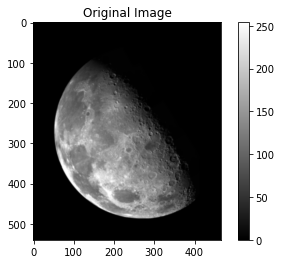

In [57]:
# Add image file
[image,magicNum,width,height,resolution] = pgmread('moon.pgm')

# Image infos
print('Magic Num:',magicNum)
print('Width:',width)
print('Height:',height)
print('Resolution:',resolution)
print('\n')

# Convert image string to byte matrix
image = bytearray(image)    
image = list(image)
image = np.array(image)
image = np.reshape(image,(height,width))

# Image byte matrix info
print('Image Matrix: \n')
print(image)
print('\n')

# Show image
plt.figure()
plt.title('Original Image')
plt.imshow(image, cmap="gray")
plt.colorbar()

Smoothed Image1:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Smoothed Image2:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


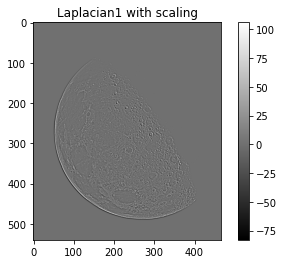

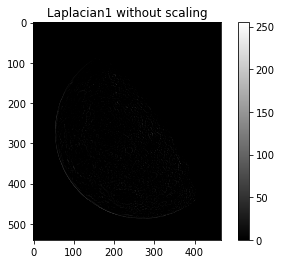

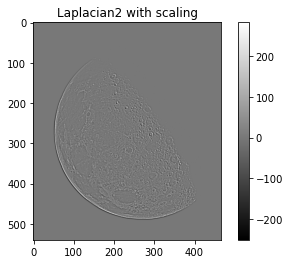

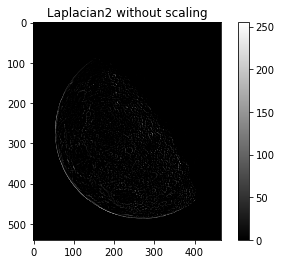

In [58]:
Laplacian1 = [[0,-1,0],[-1,4,-1],[0,-1,0]]
Laplacian2 = [[-1,-1,-1],[-1,8,-1],[-1,-1,-1]]

# Calculate the pad ,which value is 0, number to add to the image matrix
padNumber = int(len(Laplacian1)/2)

# Add pad
paddedImage = np.pad(image,padNumber,mode='constant')

# Call imageSmoother function to smooth image
smoothedImage1 = imageSmoother(paddedImage,Laplacian1,padNumber,height,width)
smoothedImage2 = imageSmoother(paddedImage,Laplacian2,padNumber,height,width)

# Show smoothed image matrix
print('Smoothed Image1:')
print(smoothedImage1)

# Show smoothed image matrix
print('Smoothed Image2:')
print(smoothedImage2)

# Show image
plt.figure()
plt.title('Laplacian1 with scaling')
plt.imshow(smoothedImage1, cmap="gray")
plt.colorbar()

# Show image
plt.figure()
plt.title('Laplacian1 without scaling')
plt.imshow(smoothedImage1, cmap="gray", vmin=0, vmax=255)
plt.colorbar()

# Show image
plt.figure()
plt.title('Laplacian2 with scaling')
plt.imshow(smoothedImage2, cmap="gray")
plt.colorbar()

# Show image
plt.figure()
plt.title('Laplacian2 without scaling')
plt.imshow(smoothedImage2, cmap="gray", vmin=0, vmax=255)
plt.colorbar()

Laplacian Filtered1 Image:  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Laplacian Filtered2 Image:  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


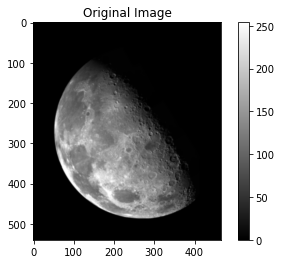

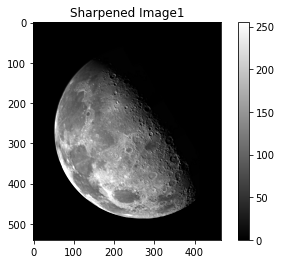

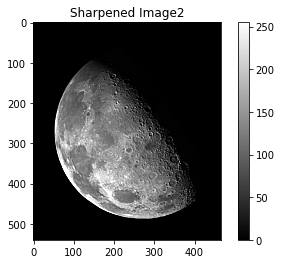

In [59]:
laplacianFiltering1 = image + smoothedImage1
laplacianFiltering2 = image + smoothedImage2

print('Laplacian Filtered1 Image: ',laplacianFiltering1)
print('Laplacian Filtered2 Image: ',laplacianFiltering2)

# Show image
plt.figure()
plt.title('Original Image')
plt.imshow(image, cmap="gray")
plt.colorbar()

# Show image
plt.figure()
plt.title('Sharpened Image1')
plt.imshow(laplacianFiltering1, cmap="gray", vmin=0, vmax=255)
plt.colorbar()

# Show image
plt.figure()
plt.title('Sharpened Image2')
plt.imshow(laplacianFiltering2, cmap="gray", vmin=0, vmax=255)
plt.colorbar()

### YORUM:

Görsel üzerinde laplacian filtresi uygulanmıştır. İki farklı laplacian filteresi için matrisler oluşturulmuştur. Biri diğerinden daha ağırlıklı olacak şekilde filtreler ayarlanmıştır. Daha ağırlıklı olan filtrenin uygulanması ile resimdeki keskinleşmeler daha belli olmuştur. İstenilen sonuca ulaşılmıştır.

### Image 3.40

Magic Num: P5
Width: 320
Height: 138
Resolution: 255


Image Matrix: 

[[51 51 51 ... 51 51 51]
 [51 51 51 ... 51 51 51]
 [51 51 51 ... 51 51 51]
 ...
 [51 51 51 ... 51 51 51]
 [51 51 51 ... 51 51 51]
 [51 51 51 ... 51 51 51]]




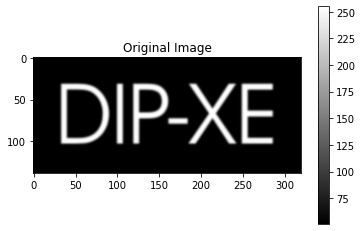

In [60]:
# Add image file
[image,magicNum,width,height,resolution] = pgmread('dipxe.pgm')

# Image infos
print('Magic Num:',magicNum)
print('Width:',width)
print('Height:',height)
print('Resolution:',resolution)
print('\n')

# Convert image string to byte matrix
image = bytearray(image)    
image = list(image)
image = np.array(image)
image = np.reshape(image,(height,width))

# Image byte matrix info
print('Image Matrix: \n')
print(image)
print('\n')

# Show image
plt.figure()
plt.title('Original Image')
plt.imshow(image, cmap="gray")
plt.colorbar()

Smoothed Image1:
[[ 3.  9. 12. ... 12. 12.  0.]
 [ 9. 28. 38. ... 38. 38.  0.]
 [12. 38. 51. ... 51. 51.  0.]
 ...
 [12. 38. 51. ... 51. 51.  0.]
 [12. 38. 51. ... 51. 51.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]
Smoothed Image2:
[[ 0.  0.  2. ...  3.  3.  0.]
 [ 0.  4. 10. ... 15. 15.  0.]
 [ 2. 10. 24. ... 35. 35.  0.]
 ...
 [ 3. 15. 35. ... 50. 50.  0.]
 [ 3. 15. 35. ... 50. 50.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]


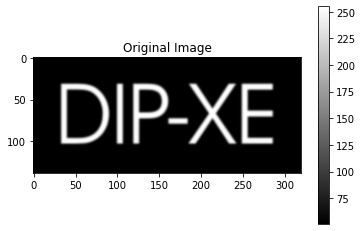

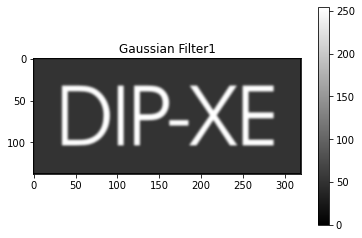

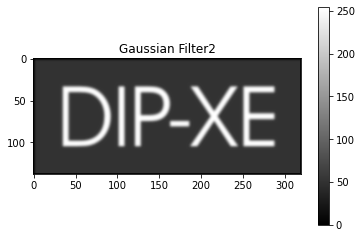

In [61]:
gaussFilter1 = [[1/16,2/16,1/16],[2/16,4/16,2/16],[1/16,2/16,1/16]]
gaussFilter2 = [[1/273,4/273,7/273,4/273,1/273],[4/273,16/273,26/273,16/273,4/273],[7/273,26/273,41/273,26/273,7/273],[4/273,16/273,26/273,16/273,4/273],[1/273,4/273,7/273,4/273,1/273]]

# Calculate the pad ,which value is 0, number to add to the image matrix
padNumber1 = int(len(gaussFilter1)/2)
padNumber2 = int(len(gaussFilter2)/2)

# Add pad
paddedImage1 = np.pad(image,padNumber1,mode='constant')
paddedImage2 = np.pad(image,padNumber2,mode='constant')

# Call imageSmoother function to smooth image
smoothedImage1 = imageSmoother(paddedImage1,gaussFilter1,padNumber1,height,width)
smoothedImage2 = imageSmoother(paddedImage2,gaussFilter2,padNumber2,height,width)

# Show smoothed image matrix
print('Smoothed Image1:')
print(smoothedImage1)

# Show smoothed image matrix
print('Smoothed Image2:')
print(smoothedImage2)

# Show image
plt.figure()
plt.title('Original Image')
plt.imshow(image, cmap="gray")
plt.colorbar()

# Show image
plt.figure()
plt.title('Gaussian Filter1')
plt.imshow(smoothedImage1, cmap="gray")
plt.colorbar()

# Show image
plt.figure()
plt.title('Gaussian Filter2')
plt.imshow(smoothedImage2, cmap="gray")
plt.colorbar()

Unsharp Mask1: [[48. 42. 39. ... 39. 39. 51.]
 [42. 23. 13. ... 13. 13. 51.]
 [39. 13.  0. ...  0.  0. 51.]
 ...
 [39. 13.  0. ...  0.  0. 51.]
 [39. 13.  0. ...  0.  0. 51.]
 [51. 51. 51. ... 51. 51. 51.]]
Unsharp Mask2: [[51. 51. 49. ... 48. 48. 51.]
 [51. 47. 41. ... 36. 36. 51.]
 [49. 41. 27. ... 16. 16. 51.]
 ...
 [48. 36. 16. ...  1.  1. 51.]
 [48. 36. 16. ...  1.  1. 51.]
 [51. 51. 51. ... 51. 51. 51.]]


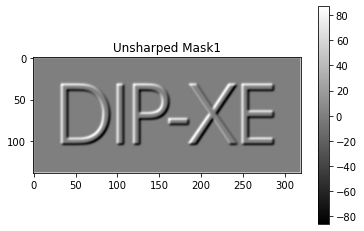

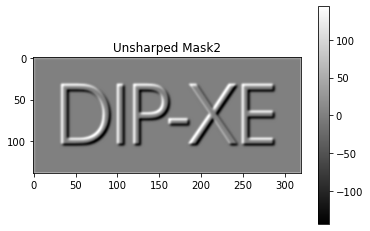

In [62]:
unsharpMask1 = image - smoothedImage1
unsharpMask2 = image - smoothedImage2

print('Unsharp Mask1:',unsharpMask1)
print('Unsharp Mask2:',unsharpMask2)

# Show image
plt.figure()
plt.title('Unsharped Mask1')
plt.imshow(unsharpMask1, cmap="gray")
plt.colorbar()

# Show image
plt.figure()
plt.title('Unsharped Mask2')
plt.imshow(unsharpMask2, cmap="gray")
plt.colorbar()

Unsharp Filtered1 Image: [[ 99.  93.  90. ...  90.  90. 102.]
 [ 93.  74.  64. ...  64.  64. 102.]
 [ 90.  64.  51. ...  51.  51. 102.]
 ...
 [ 90.  64.  51. ...  51.  51. 102.]
 [ 90.  64.  51. ...  51.  51. 102.]
 [102. 102. 102. ... 102. 102. 102.]]
Unsharp Filtered2 Image: [[102. 102. 100. ...  99.  99. 102.]
 [102.  98.  92. ...  87.  87. 102.]
 [100.  92.  78. ...  67.  67. 102.]
 ...
 [ 99.  87.  67. ...  52.  52. 102.]
 [ 99.  87.  67. ...  52.  52. 102.]
 [102. 102. 102. ... 102. 102. 102.]]
Highboost Filtered Image: [[267.  240.  226.5 ... 226.5 226.5 280.5]
 [240.  154.5 109.5 ... 109.5 109.5 280.5]
 [226.5 109.5  51.  ...  51.   51.  280.5]
 ...
 [226.5 109.5  51.  ...  51.   51.  280.5]
 [226.5 109.5  51.  ...  51.   51.  280.5]
 [280.5 280.5 280.5 ... 280.5 280.5 280.5]]


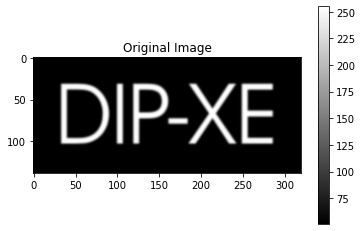

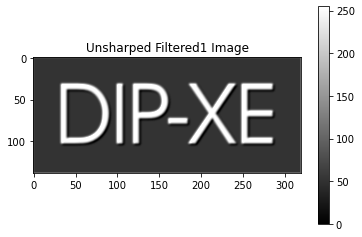

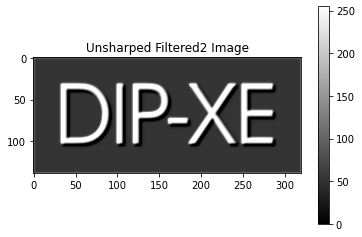

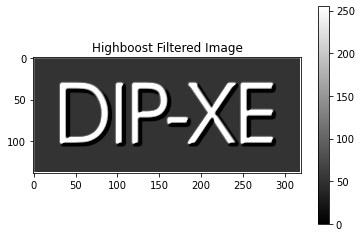

In [63]:
unsharpFiltering1 = image + unsharpMask1
highboostFiltering = image + 4.5 *unsharpMask1
unsharpFiltering2 = image + unsharpMask2

print('Unsharp Filtered1 Image:',unsharpFiltering1)
print('Unsharp Filtered2 Image:',unsharpFiltering2)
print('Highboost Filtered Image:',highboostFiltering)

# Show image
plt.figure()
plt.title('Original Image')
plt.imshow(image, cmap="gray")
plt.colorbar()

# Show image
plt.figure()
plt.title('Unsharped Filtered1 Image')
plt.imshow(unsharpFiltering1, cmap="gray", vmin=0, vmax=255)
plt.colorbar()

# Show image
plt.figure()
plt.title('Unsharped Filtered2 Image')
plt.imshow(unsharpFiltering2, cmap="gray", vmin=0, vmax=255)
plt.colorbar()

# Show image
plt.figure()
plt.title('Highboost Filtered Image')
plt.imshow(highboostFiltering, cmap="gray", vmin=0, vmax=255)
plt.colorbar()

### Yorum:

Önceki resimden farklı olaran bu sefer yumuşatma için gauss uygulanmıştır. Kitaptaki örnekte de bu şekilde yapıldığı için böyle yapılmıştır. 3x3 ve 5x5 gauss filtreleri uygulanmıştır. Beklenilen sonuç olarak 5x5 gauss filteresi uygulanan resimde yazının daha keskinleştiği görülmüştür. Ayrıca 3x3 gauss'a katsayı olarak 4.5 verilerek highboost filtresi de uygulanmıştır. En iyi sonuç beklenilen üzere highboost filtresinde oluşmuştur. Sadece elde edilen sonuçlardaki, orijinal resme göre siyah olması gereken kısımlarda grileşme olmuştur. Bunun sebebinin işlemler sonucu - değere giden piksel değerlerinin, normalleştirme sonucu 0 değerine giderken, 0 değerinde olan piksellerin değerinin biraz daha artarak grileşmesi olduğu düşünülmektedir. Bir önceki örnekte böyle bir şeyin olmamasını - değere giden piksel değerlerinin daha büyük olmasından kaynaklandığını düşünmekteyim. Özellikle highboost filtresi uygulandığında çıkan görselde bu grileşme daha belirgindir. Asıl siyah renkleri, keskinleşmenin olduğu yazının çevresindeki piksellerin aldığını, bu sayede yazıya yüksek keskinlik kazandırdığını görmekteyiz. Dezavantaj olarak ise asıl siyah olması gereken piksellerde hafif bir grileşme gördük.

### Image 3.20

##### Image 3.20.a

Magic Num: P5
Width: 500
Height: 500
Resolution: 255


Image Matrix: 

[[13 13 13 ... 36 36 33]
 [13 13 13 ... 35 35 31]
 [13 13 13 ... 29 29 26]
 ...
 [19 13 13 ... 58 56 56]
 [20 15 13 ... 56 56 53]
 [22 18 13 ... 55 55 49]]




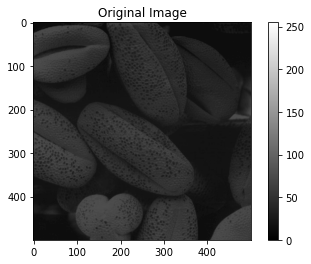

In [64]:
# Add image file
[image,magicNum,width,height,resolution] = pgmread('apricot1.pgm')

# Image infos
print('Magic Num:',magicNum)
print('Width:',width)
print('Height:',height)
print('Resolution:',resolution)
print('\n')

# Convert image string to byte matrix
image = bytearray(image)    
image = list(image)
image = np.array(image)
image = np.reshape(image,(height,width))

# Image byte matrix info
print('Image Matrix: \n')
print(image)
print('\n')

# Show image
plt.figure()
plt.title('Original Image')
plt.imshow(image, cmap="gray", vmin=0, vmax=255)
plt.colorbar()

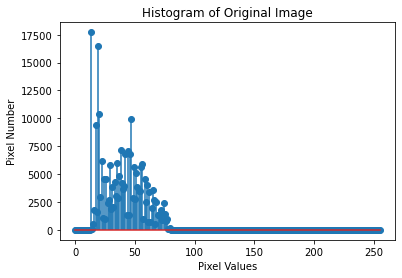

Probability of pixels: 1.0000000000000002


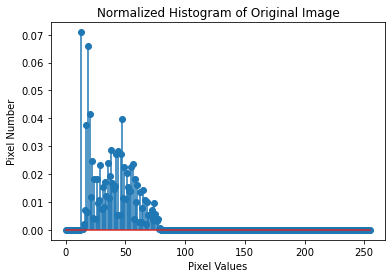

CDFs Last Value: 1.0000000000000002


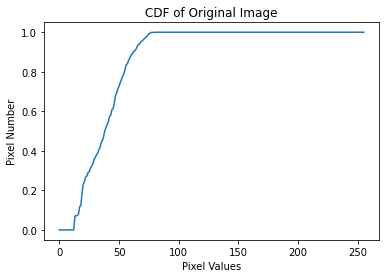

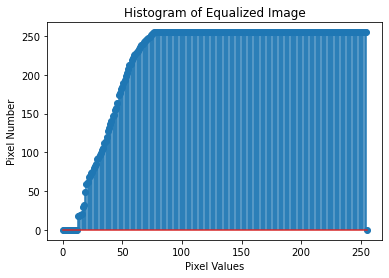

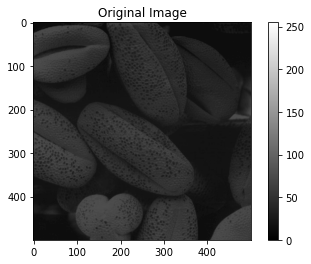

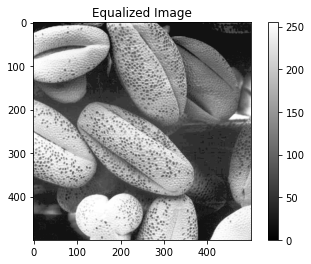

In [65]:
heightIndex = 0
widthIndex = 0
histogramVector = np.zeros((resolution+1))

for heightIndex in range(height):
    for widthIndex in range(width):
        histogramVector[image[heightIndex][widthIndex]] = histogramVector[image[heightIndex][widthIndex]] + 1
        widthIndex = widthIndex + 1
    heightIndex = heightIndex + 1

# Show image
plt.figure()
plt.title('Histogram of Original Image')
plt.stem(histogramVector)
plt.xlabel('Pixel Values')
plt.ylabel('Pixel Number')
plt.show()

pixelValueSum = 0
histogramIndex = 0

for histogramIndex in range(resolution+1):
    pixelValueSum = pixelValueSum + histogramVector[histogramIndex]
    histogramIndex = histogramIndex + 1

pdfIndex = 0
pdfVector = np.zeros((resolution+1))
pdfVector = histogramVector

for pdfIndex in range(resolution+1):
    pdfVector[pdfIndex] = pdfVector[pdfIndex] / pixelValueSum
    pdfIndex = pdfIndex + 1

pdfIndex = 0
probabilityOfHistogram = 0

for pdfIndex in range(resolution+1):
    probabilityOfHistogram = probabilityOfHistogram + pdfVector[pdfIndex]
    pdfIndex = pdfIndex + 1

print('Probability of pixels:',probabilityOfHistogram)

# Show image
plt.figure()
plt.title('Normalized Histogram of Original Image')
plt.stem(pdfVector)
plt.xlabel('Pixel Values')
plt.ylabel('Pixel Number')
plt.show()

cdfVector = np.zeros((resolution+1))
cdfIndex = 0

for cdfIndex in range(resolution+1):
    cdfVector[cdfIndex] = pdfVector[cdfIndex] + cdfVector[cdfIndex-1]
    cdfIndex = cdfIndex + 1
    
    
print('CDFs Last Value:',cdfVector[254])

# Show image
plt.figure()
plt.title('CDF of Original Image')
plt.plot(cdfVector)
plt.xlabel('Pixel Values')
plt.ylabel('Pixel Number')
plt.show()

equalizedVector = np.zeros((resolution+1))
equalizedIndex = 0

for equalizedIndex in range(resolution):
    equalizedVector[equalizedIndex] = round(cdfVector[equalizedIndex]*255)
    equalizedIndex = equalizedIndex + 1

# Show image
plt.figure()
plt.title('Histogram of Equalized Image')
plt.stem(equalizedVector)
plt.xlabel('Pixel Values')
plt.ylabel('Pixel Number')
plt.show()

equalizedMatrix = np.zeros((height,width))
heightIndex = 0
widthIndex = 0
for heightIndex in range(height):
    for widthIndex in range(width):
        equalizedMatrix[heightIndex][widthIndex] = equalizedVector[image[heightIndex][widthIndex]]
        widthIndex = widthIndex + 1
    heightIndex = heightIndex + 1

# Show image
plt.figure()
plt.title('Original Image')
plt.imshow(image, cmap="gray", vmin=0, vmax=255)
plt.colorbar()

# Show image
plt.figure()
plt.title('Equalized Image')
plt.imshow(equalizedMatrix, cmap="gray", vmin=0, vmax=255)
plt.colorbar()

##### Image 3.20.b

Magic Num: P5
Width: 500
Height: 500
Resolution: 255


Image Matrix: 

[[132 132 132 ... 191 191 184]
 [132 132 132 ... 190 190 179]
 [132 132 132 ... 175 175 166]
 ...
 [149 132 132 ... 248 242 242]
 [151 138 132 ... 242 242 235]
 [156 145 132 ... 240 240 224]]




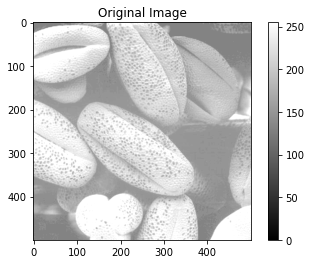

In [66]:
# Add image file
[image,magicNum,width,height,resolution] = pgmread('apricot2.pgm')

# Image infos
print('Magic Num:',magicNum)
print('Width:',width)
print('Height:',height)
print('Resolution:',resolution)
print('\n')

# Convert image string to byte matrix
image = bytearray(image)    
image = list(image)
image = np.array(image)
image = np.reshape(image,(height,width))

# Image byte matrix info
print('Image Matrix: \n')
print(image)
print('\n')

# Show image
plt.figure()
plt.title('Original Image')
plt.imshow(image, cmap="gray", vmin=0, vmax=255)
plt.colorbar()

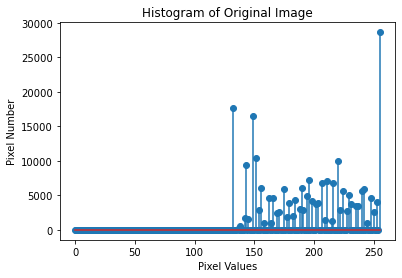

Probability of pixels: 1.0000000000000002


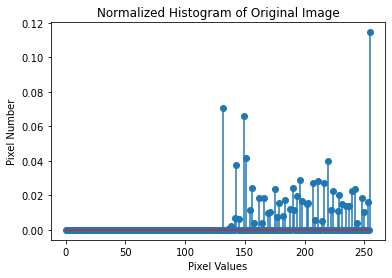

CDFs Last Value: 1.0000000000000002


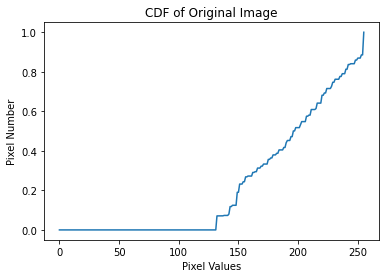

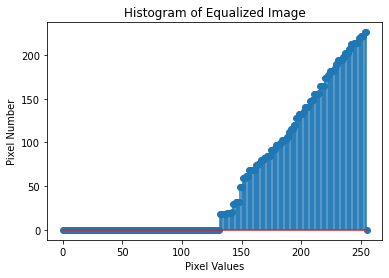

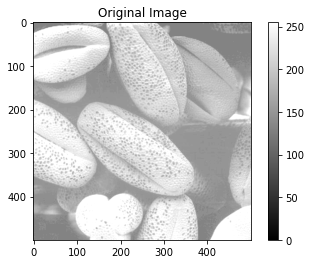

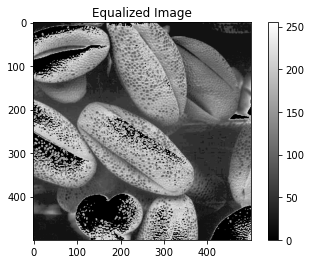

In [67]:
heightIndex = 0
widthIndex = 0
histogramVector = np.zeros((resolution+1))

for heightIndex in range(height):
    for widthIndex in range(width):
        histogramVector[image[heightIndex][widthIndex]] = histogramVector[image[heightIndex][widthIndex]] + 1
        widthIndex = widthIndex + 1
    heightIndex = heightIndex + 1

# Show image
plt.figure()
plt.title('Histogram of Original Image')
plt.stem(histogramVector)
plt.xlabel('Pixel Values')
plt.ylabel('Pixel Number')
plt.show()

pixelValueSum = 0
histogramIndex = 0

for histogramIndex in range(resolution+1):
    pixelValueSum = pixelValueSum + histogramVector[histogramIndex]
    histogramIndex = histogramIndex + 1

pdfIndex = 0
pdfVector = np.zeros((resolution+1))
pdfVector = histogramVector

for pdfIndex in range(resolution+1):
    pdfVector[pdfIndex] = pdfVector[pdfIndex] / pixelValueSum
    pdfIndex = pdfIndex + 1

pdfIndex = 0
probabilityOfHistogram = 0

for pdfIndex in range(resolution+1):
    probabilityOfHistogram = probabilityOfHistogram + pdfVector[pdfIndex]
    pdfIndex = pdfIndex + 1

print('Probability of pixels:',probabilityOfHistogram)

# Show image
plt.figure()
plt.title('Normalized Histogram of Original Image')
plt.stem(pdfVector)
plt.xlabel('Pixel Values')
plt.ylabel('Pixel Number')
plt.show()

cdfVector = np.zeros((resolution+1))
cdfIndex = 0

for cdfIndex in range(resolution+1):
    cdfVector[cdfIndex] = pdfVector[cdfIndex] + cdfVector[cdfIndex-1]
    cdfIndex = cdfIndex + 1
    
    
print('CDFs Last Value:',cdfVector[255])

# Show image
plt.figure()
plt.title('CDF of Original Image')
plt.plot(cdfVector)
plt.xlabel('Pixel Values')
plt.ylabel('Pixel Number')
plt.show()

equalizedVector = np.zeros((resolution+1))
equalizedIndex = 0

for equalizedIndex in range(resolution):
    equalizedVector[equalizedIndex] = round(cdfVector[equalizedIndex]*255)
    equalizedIndex = equalizedIndex + 1

# Show image
plt.figure()
plt.title('Histogram of Equalized Image')
plt.stem(equalizedVector)
plt.xlabel('Pixel Values')
plt.ylabel('Pixel Number')
plt.show()

equalizedMatrix = np.zeros((height,width))
heightIndex = 0
widthIndex = 0
for heightIndex in range(height):
    for widthIndex in range(width):
        equalizedMatrix[heightIndex][widthIndex] = equalizedVector[image[heightIndex][widthIndex]]
        widthIndex = widthIndex + 1
    heightIndex = heightIndex + 1

# Show image
plt.figure()
plt.title('Original Image')
plt.imshow(image, cmap="gray", vmin=0, vmax=255)
plt.colorbar()

# Show image
plt.figure()
plt.title('Equalized Image')
plt.imshow(equalizedMatrix, cmap="gray", vmin=0, vmax=255)
plt.colorbar()

##### Image 3.20.c

Magic Num: P5
Width: 500
Height: 500
Resolution: 255


Image Matrix: 

[[ 91  91  91 ... 107 107 105]
 [ 91  91  91 ... 106 106 104]
 [ 91  91  91 ... 103 103 101]
 ...
 [ 96  91  91 ... 122 121 121]
 [ 97  94  91 ... 121 120 119]
 [ 98  96  91 ... 120 120 117]]




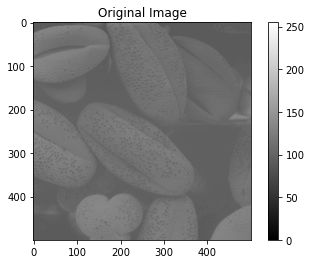

In [68]:
# Add image file
[image,magicNum,width,height,resolution] = pgmread('apricot3.pgm')

# Image infos
print('Magic Num:',magicNum)
print('Width:',width)
print('Height:',height)
print('Resolution:',resolution)
print('\n')

# Convert image string to byte matrix
image = bytearray(image)    
image = list(image)
image = np.array(image)
image = np.reshape(image,(height,width))

# Image byte matrix info
print('Image Matrix: \n')
print(image)
print('\n')

# Show image
plt.figure()
plt.title('Original Image')
plt.imshow(image, cmap="gray", vmin=0, vmax=255)
plt.colorbar()

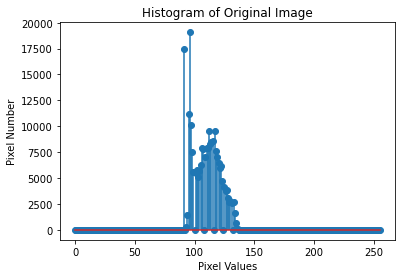

Probability of pixels: 1.0


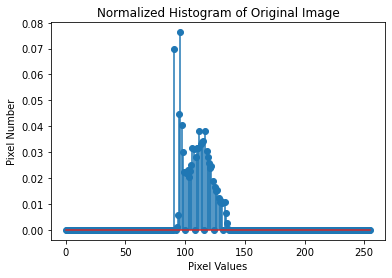

CDFs Last Value: 1.0


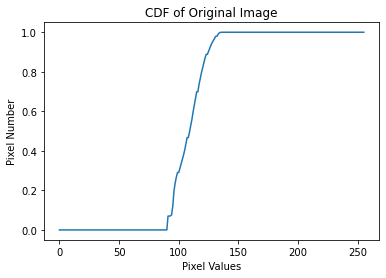

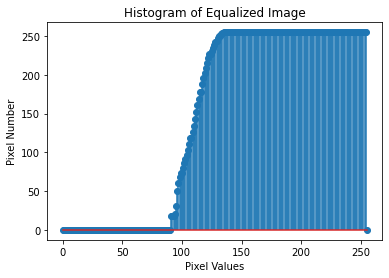

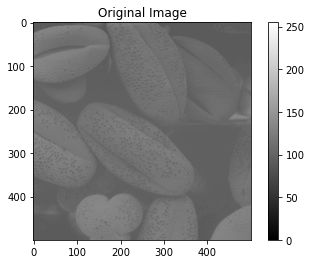

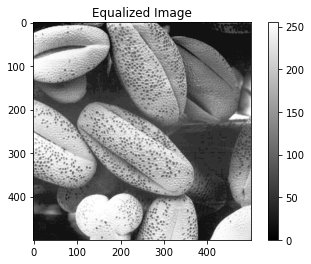

In [69]:
heightIndex = 0
widthIndex = 0
histogramVector = np.zeros((resolution+1))

for heightIndex in range(height):
    for widthIndex in range(width):
        histogramVector[image[heightIndex][widthIndex]] = histogramVector[image[heightIndex][widthIndex]] + 1
        widthIndex = widthIndex + 1
    heightIndex = heightIndex + 1

# Show image
plt.figure()
plt.title('Histogram of Original Image')
plt.stem(histogramVector)
plt.xlabel('Pixel Values')
plt.ylabel('Pixel Number')
plt.show()

pixelValueSum = 0
histogramIndex = 0

for histogramIndex in range(resolution+1):
    pixelValueSum = pixelValueSum + histogramVector[histogramIndex]
    histogramIndex = histogramIndex + 1

pdfIndex = 0
pdfVector = np.zeros((resolution+1))
pdfVector = histogramVector

for pdfIndex in range(resolution+1):
    pdfVector[pdfIndex] = pdfVector[pdfIndex] / pixelValueSum
    pdfIndex = pdfIndex + 1

pdfIndex = 0
probabilityOfHistogram = 0

for pdfIndex in range(resolution+1):
    probabilityOfHistogram = probabilityOfHistogram + pdfVector[pdfIndex]
    pdfIndex = pdfIndex + 1

print('Probability of pixels:',probabilityOfHistogram)

# Show image
plt.figure()
plt.title('Normalized Histogram of Original Image')
plt.stem(pdfVector)
plt.xlabel('Pixel Values')
plt.ylabel('Pixel Number')
plt.show()

cdfVector = np.zeros((resolution+1))
cdfIndex = 0

for cdfIndex in range(resolution+1):
    cdfVector[cdfIndex] = pdfVector[cdfIndex] + cdfVector[cdfIndex-1]
    cdfIndex = cdfIndex + 1
    
    
print('CDFs Last Value:',cdfVector[255])

# Show image
plt.figure()
plt.title('CDF of Original Image')
plt.plot(cdfVector)
plt.xlabel('Pixel Values')
plt.ylabel('Pixel Number')
plt.show()

equalizedVector = np.zeros((resolution+1))
equalizedIndex = 0

for equalizedIndex in range(resolution):
    equalizedVector[equalizedIndex] = round(cdfVector[equalizedIndex]*255)
    equalizedIndex = equalizedIndex + 1

# Show image
plt.figure()
plt.title('Histogram of Equalized Image')
plt.stem(equalizedVector)
plt.xlabel('Pixel Values')
plt.ylabel('Pixel Number')
plt.show()

equalizedMatrix = np.zeros((height,width))
heightIndex = 0
widthIndex = 0
for heightIndex in range(height):
    for widthIndex in range(width):
        equalizedMatrix[heightIndex][widthIndex] = equalizedVector[image[heightIndex][widthIndex]]
        widthIndex = widthIndex + 1
    heightIndex = heightIndex + 1

# Show image
plt.figure()
plt.title('Original Image')
plt.imshow(image, cmap="gray", vmin=0, vmax=255)
plt.colorbar()

# Show image
plt.figure()
plt.title('Equalized Image')
plt.imshow(equalizedMatrix, cmap="gray", vmin=0, vmax=255)
plt.colorbar()

##### Image 3.20.d

Magic Num: P5
Width: 500
Height: 500
Resolution: 255


Image Matrix: 

[[  0   0   0 ... 102 102  89]
 [  0   0   0 ...  94  97  81]
 [  0   0   0 ...  71  75  57]
 ...
 [ 24   0   0 ... 201 193 192]
 [ 32  11   0 ... 192 187 176]
 [ 45  23   0 ... 184 183 162]]




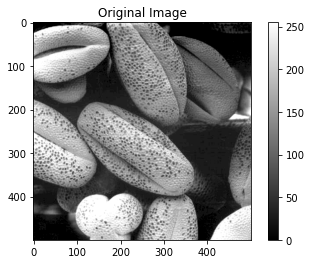

In [70]:
# Add image file
[image,magicNum,width,height,resolution] = pgmread('apricot4.pgm')

# Image infos
print('Magic Num:',magicNum)
print('Width:',width)
print('Height:',height)
print('Resolution:',resolution)
print('\n')

# Convert image string to byte matrix
image = bytearray(image)    
image = list(image)
image = np.array(image)
image = np.reshape(image,(height,width))

# Image byte matrix info
print('Image Matrix: \n')
print(image)
print('\n')

# Show image
plt.figure()
plt.title('Original Image')
plt.imshow(image, cmap="gray", vmin=0, vmax=255)
plt.colorbar()

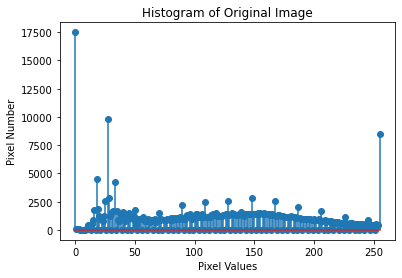

Probability of pixels: 1.0


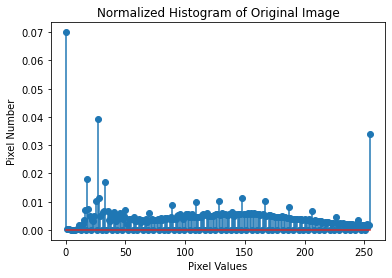

CDFs Last Value: 1.0


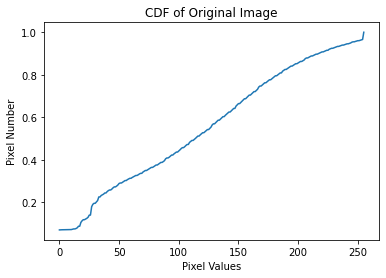

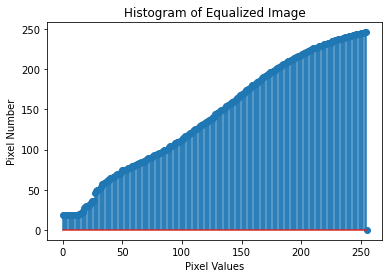

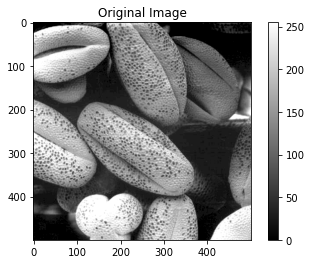

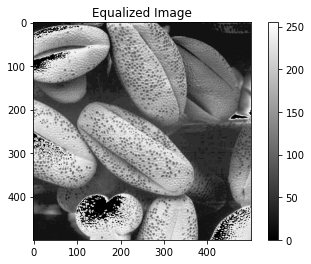

In [71]:
heightIndex = 0
widthIndex = 0
histogramVector = np.zeros((resolution+1))

for heightIndex in range(height):
    for widthIndex in range(width):
        histogramVector[image[heightIndex][widthIndex]] = histogramVector[image[heightIndex][widthIndex]] + 1
        widthIndex = widthIndex + 1
    heightIndex = heightIndex + 1

# Show image
plt.figure()
plt.title('Histogram of Original Image')
plt.stem(histogramVector)
plt.xlabel('Pixel Values')
plt.ylabel('Pixel Number')
plt.show()

pixelValueSum = 0
histogramIndex = 0

for histogramIndex in range(resolution+1):
    pixelValueSum = pixelValueSum + histogramVector[histogramIndex]
    histogramIndex = histogramIndex + 1

pdfIndex = 0
pdfVector = np.zeros((resolution+1))
pdfVector = histogramVector

for pdfIndex in range(resolution+1):
    pdfVector[pdfIndex] = pdfVector[pdfIndex] / pixelValueSum
    pdfIndex = pdfIndex + 1

pdfIndex = 0
probabilityOfHistogram = 0

for pdfIndex in range(resolution+1):
    probabilityOfHistogram = probabilityOfHistogram + pdfVector[pdfIndex]
    pdfIndex = pdfIndex + 1

print('Probability of pixels:',probabilityOfHistogram)

# Show image
plt.figure()
plt.title('Normalized Histogram of Original Image')
plt.stem(pdfVector)
plt.xlabel('Pixel Values')
plt.ylabel('Pixel Number')
plt.show()

cdfVector = np.zeros((resolution+1))
cdfIndex = 0

for cdfIndex in range(resolution+1):
    cdfVector[cdfIndex] = pdfVector[cdfIndex] + cdfVector[cdfIndex-1]
    cdfIndex = cdfIndex + 1
    
    
print('CDFs Last Value:',cdfVector[255])

# Show image
plt.figure()
plt.title('CDF of Original Image')
plt.plot(cdfVector)
plt.xlabel('Pixel Values')
plt.ylabel('Pixel Number')
plt.show()

equalizedVector = np.zeros((resolution+1))
equalizedIndex = 0

for equalizedIndex in range(resolution):
    equalizedVector[equalizedIndex] = round(cdfVector[equalizedIndex]*255)
    equalizedIndex = equalizedIndex + 1

# Show image
plt.figure()
plt.title('Histogram of Equalized Image')
plt.stem(equalizedVector)
plt.xlabel('Pixel Values')
plt.ylabel('Pixel Number')
plt.show()

equalizedMatrix = np.zeros((height,width))
heightIndex = 0
widthIndex = 0
for heightIndex in range(height):
    for widthIndex in range(width):
        equalizedMatrix[heightIndex][widthIndex] = equalizedVector[image[heightIndex][widthIndex]]
        widthIndex = widthIndex + 1
    heightIndex = heightIndex + 1

# Show image
plt.figure()
plt.title('Original Image')
plt.imshow(image, cmap="gray", vmin=0, vmax=255)
plt.colorbar()

# Show image
plt.figure()
plt.title('Equalized Image')
plt.imshow(equalizedMatrix, cmap="gray", vmin=0, vmax=255)
plt.colorbar()

### YORUM:

4 resimin çıktısı da incelendiğinde istenilen sonuçlara a ve c resimlerinde ulaşıldığı söylenebilir. b ve d resimlerinde ise beklenmeyen bölgesel siyahlıklar görülmektedir. Bunun sebebinin ise histogram eşitleme yapılıdığı kısımda cdf vektöründeki değerlerin maksimum piksel değeri olan 255 ile çarpılması sonucu beklenmeyen bir şekilde 255'e yakın olması beklenen piksellerin 0 değerine gitmesidir. Sebebi anlaşılamamıştır.